In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dados

In [2]:
dados = np.random.normal(1, 0.5, [100, 2])
dados.shape

(100, 2)

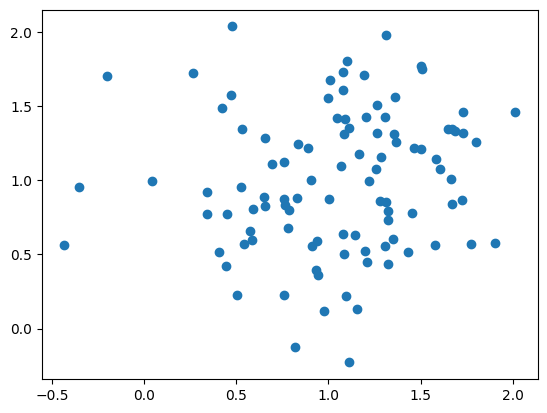

In [3]:
plt.scatter(dados[:,0], dados[:,1])

In [4]:
# coloca no formato (x, y, LABEL)
# dados de classe 1
dados = np.hstack([dados, np.ones([100,1])])
dados.shape

(100, 3)

In [5]:
# insere nos dados, mais 100 amostras de classe -1

dados = np.vstack([dados,
                   np.hstack([np.random.normal(-2, 1, [100,2]),
                              np.zeros([100,1])-1])]
)
dados.shape

(200, 3)

In [6]:
# embaralhar
dados = dados[np.random.permutation(dados.shape[0])]

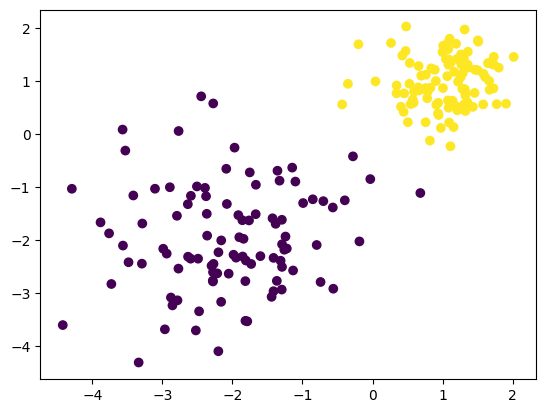

In [7]:
plt.scatter(dados[:,0], dados[:,1], c = dados[:,2])

# agora sim

In [8]:
# n_input é o num de atributos q eu tenho
def initialize_perceptron(n_input):
  w = np.random.normal(size=[1,n_input]) # vetor coluna, dados entre 0 e 1
  b = np.random.normal()
  return w, b

def degrau(u):
  a = np.ones(u.shape)
  a[u < 0] = -1
  return a

def forward(X, w, b):
  u = b + np.dot(w, X.T)
  return degrau(u)

def loss(y_hat, y):
  return y - y_hat

In [9]:
w, b = initialize_perceptron(n_input = dados.shape[1]-1)
print(w, b)

[[-0.25346321  0.67334453]] -2.1688175840331687


In [26]:
lr = 0.01
err = 0

for i in range(dados.shape[0]):

  X = dados[i,:2] # exemplo por exemplo
  y = dados[i,2]

  y_hat = forward(X, w, b)

  e = loss(y_hat, y)
  err += abs(e)

  delta_w = lr * e * X # considerando, então, o aprendizado estocástico
  delta_b = lr * e * 1 # bias é um fixo 1, muda o peso

  w += delta_w
  b += delta_b

print(w, b)
print(err/2)

[[0.89277192 1.57137708]] [-0.46881758]
[0.]
